In [1]:
import torch
import torch.nn as nn
import numpy as np
import math

a = [1, 2, 3, 4, 5]
b = [2, 3, 4, 5, 6]
a = torch.FloatTensor(a)
b = torch.FloatTensor(b)
c = b - a
print(c)


tensor([1., 1., 1., 1., 1.])


In [2]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque


class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.network = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
        )
    def forward(self, x):
        x = self.flatten()
        return self.network(x)

In [3]:
model = Network().to(device = 'cpu')
print(model)

Network(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (network): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
  )
)


In [4]:
x = torch.ones(5)
print(x)
y = torch.zeros(3)
print(y)
w = torch.rand(5, 3, requires_grad=True)
b = torch.rand(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
loss.backward()
print(loss)
print(w.grad)
print(b.grad)

tensor([1., 1., 1., 1., 1.])
tensor([0., 0., 0.])
tensor(3.0723, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor([[0.3120, 0.3167, 0.3230],
        [0.3120, 0.3167, 0.3230],
        [0.3120, 0.3167, 0.3230],
        [0.3120, 0.3167, 0.3230],
        [0.3120, 0.3167, 0.3230]])
tensor([0.3120, 0.3167, 0.3230])


In [11]:
import torch

ok = [1, 2, 3, 4]
ok = torch.FloatTensor(ok)
values = [2, 3, 4, 5]
values = torch.FloatTensor(values)
advantages = ok - 2
print(advantages)

tensor([-1.,  0.,  1.,  2.])


Giá trị tối ưu của x: 0.7250055433087356
Giá trị nhỏ nhất của f(x): -0.4783617166860751


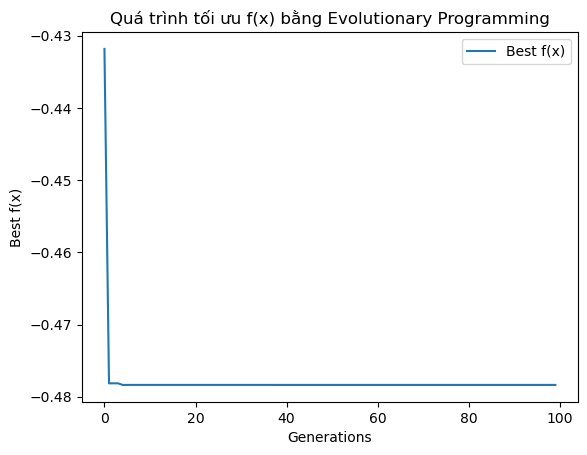

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa hàm f(x) cần tối ưu (hàm cần tìm giá trị nhỏ nhất)
def f(x):
    return np.sin(2 * np.pi * x) * np.exp(-x)

# Thông số thuật toán EP
num_generations = 100   # Số thế hệ tối đa
population_size = 20    # Số cá thể trong quần thể
mutation_std = 0.1      # Độ lệch chuẩn của đột biến Gaussian
search_range = (0, 2)   # Giới hạn tìm kiếm của x

# Khởi tạo quần thể ban đầu (ngẫu nhiên trong khoảng [0,2])
population = np.random.uniform(search_range[0], search_range[1], population_size)

# Lưu lại lịch sử giá trị nhỏ nhất của f(x) theo từng thế hệ
best_fitness_history = []

for generation in range(num_generations):
    # Tính giá trị f(x) cho từng cá thể
    fitness = f(population)

    # Lưu lại cá thể tốt nhất trong thế hệ hiện tại
    best_fitness_history.append(np.min(fitness))

    # Thực hiện đột biến Gaussian
    mutations = np.random.normal(0, mutation_std, population_size)
    offspring = population + mutations

    # Giới hạn giá trị x trong khoảng [0,2]
    offspring = np.clip(offspring, search_range[0], search_range[1])

    # Chọn những cá thể có giá trị nhỏ nhất của f(x)
    combined_population = np.concatenate((population, offspring))
    combined_fitness = f(combined_population)

    # Chọn lại quần thể bằng cách lấy N cá thể có f(x) nhỏ nhất
    best_indices = np.argsort(combined_fitness)[:population_size]
    population = combined_population[best_indices]

# Kết quả cuối cùng
best_x = population[np.argmin(f(population))]
best_y = f(best_x)

print(f"Giá trị tối ưu của x: {best_x}")
print(f"Giá trị nhỏ nhất của f(x): {best_y}")

# Vẽ biểu đồ quá trình tối ưu
plt.plot(best_fitness_history, label="Best f(x)")
plt.xlabel("Generations")
plt.ylabel("Best f(x)")
plt.title("Quá trình tối ưu f(x) bằng Evolutionary Programming")
plt.legend()
plt.show()
